# Multiple Variable Linear Regression
Now we will do the linear regression using multiple features to predict one label

we have this data but its not in its fine state we have to clean this first
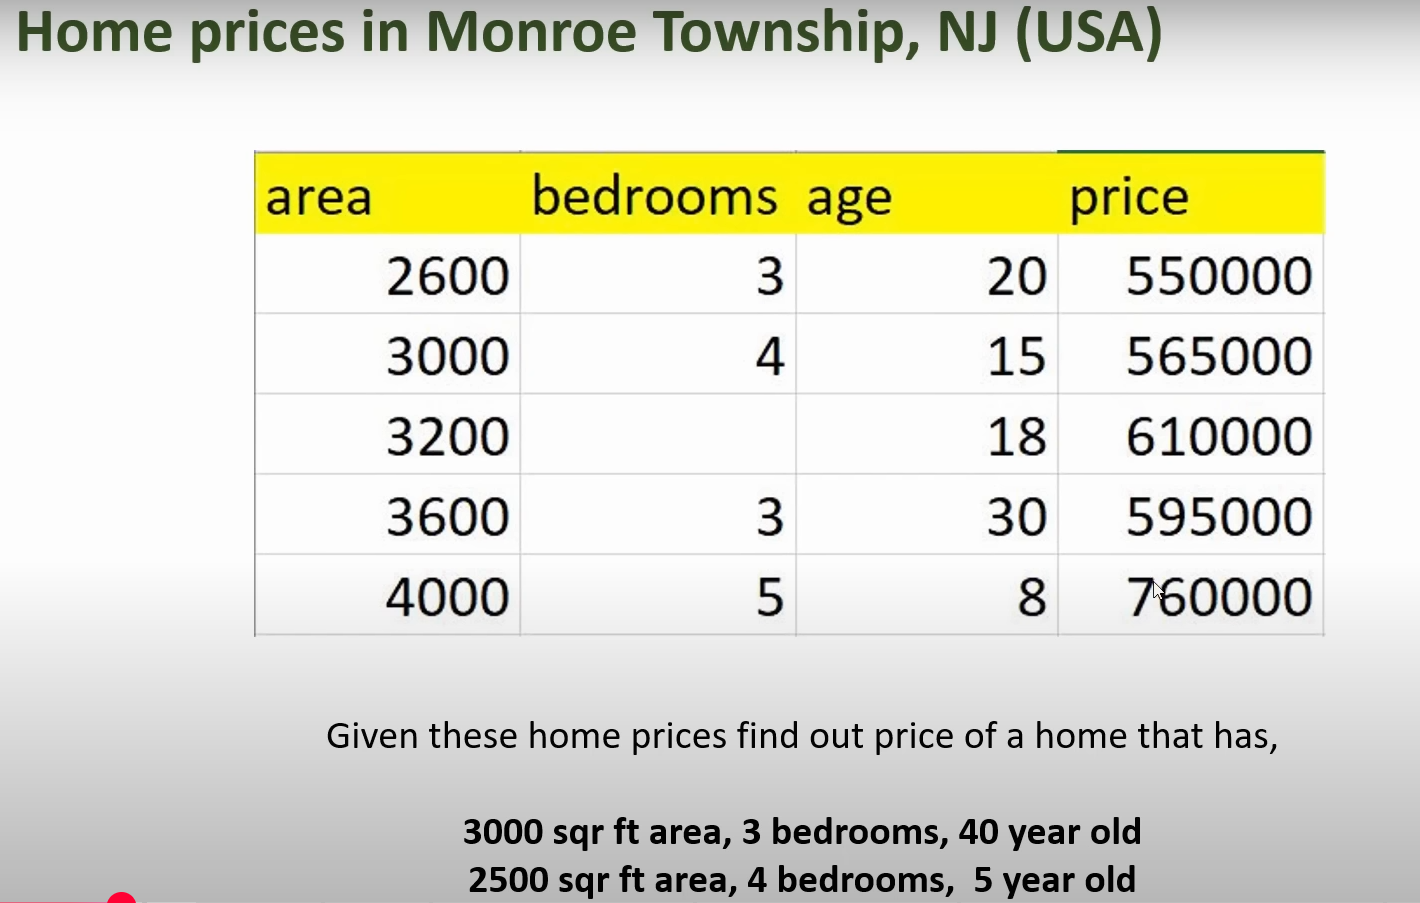

Lets look at the formula here we have 3 factors (area,bedrooms,age) to predict the price(label)

so by using  ** y = mx+b ** eqn

our mathamatical form will look like this 

### y = m1 * f1 + m2 * f2 + m3 * f3 + b

### price = m1 * area + m2 * bedrooms + m3 * age + b

here price is the dependent variable beacuse it depends upon our 3 features
and the features are independent variables

m1, m2 and m3 are coeff and b is intercept


## First we will learn how to handle NA values and linear regression using multiple variables



In [2]:
import pandas as pd
from sklearn import linear_model
import numpy as np

In [3]:
df = pd.read_csv('1.2 data.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


look there is a NA values in the bedrooms column in row 2 so to fix that we will calculate the median then put it there

In [4]:
bedrooms_median = int(df.bedrooms.median())
bedrooms_median # now we have the median value of bedrooms so lets fill the missing values with this value

3

In [5]:
df.bedrooms = df.bedrooms.fillna(bedrooms_median)

In [6]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [7]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [8]:
reg.predict([[3000,3,40]]) # lets predict the price of a house with 3000 sqft area, 3 bedrooms and 40 years old house

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [9]:
# now lets calculate it manually

# price = m1*area + m2*bedrooms + m3*age + b here m is the coefficient and b is the intercept

reg.coef_ # this will give us the values of m1, m2 and m3

array([   137.25, -26025.  ,  -6825.  ])

In [10]:
reg.intercept_ # this will give us the value of b

383724.9999999998

In [11]:
137.25*3000 + -26025*3 + -6825*40 + 383724.9999999998 # this is the manual calculation of the price of the house

444399.9999999998

## Excersize 

using the hiring.csv file train a model to predict the salary 

tips: use python word2number library

In [12]:
from word2number import w2n 


df = pd.read_csv('hiring.csv')
df.head()


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [13]:
df['experience'] = df['experience'].fillna('zero')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [14]:
df['experience'] = df['experience'].map(w2n.word_to_num)

In [15]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [16]:
test_score_median = int(df['test_score(out of 10)'].median())
test_score_median

8

In [17]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(test_score_median)

In [18]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [19]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [20]:
reg.predict([[1,8,9]]) # lets predict the salary of a person with 1 year experience, 8 test score and 9 interview score

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([55163.02765648])

# Tuto of ch 3.1.1

In [23]:
import pickle

with open('model_pickle','wb')as f:
    pickle.dump(reg,f)

In [24]:
with open("model_pickle",'rb')as f:
    mp = pickle.load(f)

In [27]:
mp.predict([[2,10,10]])

c:\Users\Nabeel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63872.63464338])

# Tuto for ch 3.1.2 

In [29]:
import joblib

In [32]:
joblib.dump(reg,"model_joblib")

['model_joblib']

In [33]:
mj = joblib.load("model_joblib")

In [34]:
mj.intercept_

array([2812.95487627, 1845.70596798, 2205.24017467])